In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import skimage
from skimage import io
import glob

import sklearn
from scipy.ndimage import gaussian_filter

## First we'll do background segmentation:

In [2]:
## Read in two mammo images: 
dense = io.imread('dense/mdb003.pgm')
fatty = io.imread('fatty/mdb005.pgm')

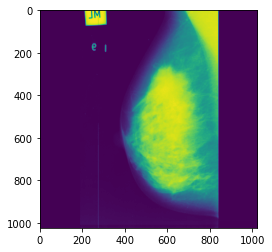

In [3]:
plt.imshow(dense)

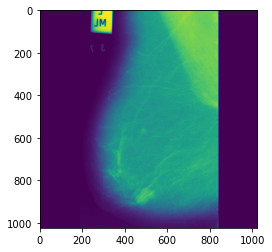

In [4]:
plt.imshow(fatty)

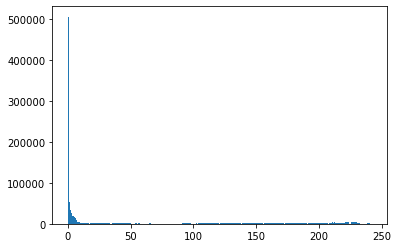

In [5]:
x = plt.hist(dense.ravel(),bins=256)

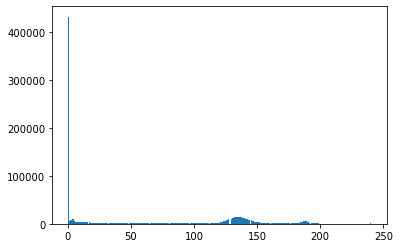

In [6]:
x = plt.hist(fatty.ravel(),bins=256)

In [55]:
## Next, experiment with different cut-off intensity thresholds to try to separate the background of the image
## Uncomment the code below and play with the value of 'thresh' to create two new binarized images
dense = gaussian_filter(dense, sigma = 5)
fatty = gaussian_filter(fatty, sigma = 5)
thresh = 10

dense_bin = (dense > thresh) * 255
fatty_bin = (fatty > thresh) * 255

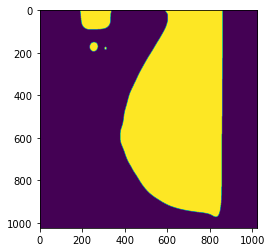

In [56]:
## Visualize the binarized images to see if the threshold you chose separates the breast tissue from the background
plt.imshow(dense_bin)

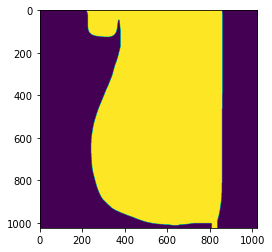

In [57]:
plt.imshow(fatty_bin)

Experiment with different values of 'thresh' above until you are satisfied that you are able to create a reasonable separation of tissue from background.

One image pre-processing trick you might try before binarizing is _smoothing_ which you perform with a gaussian filter. Try adding the following step before binarization: 

img_smooth = gaussian_filter(img, sigma = 5)

Where changing the value of _sigma_ will change the amount of smoothing. 

## Once you have chosen your value of thresh, let's use it to see if we can classify dense v. fatty breast tissue: 

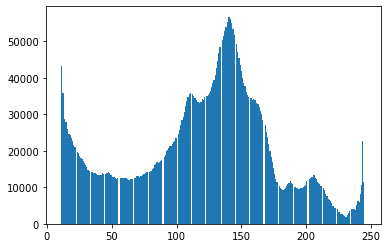

In [58]:
## Let's first get all of the intensity values of the breast tissue for our fatty breast images using the
## segmentation method above
fatty_imgs = glob.glob("fatty/*")
dense_imgs = glob.glob("dense/*")

fatty_intensities = []

for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    fatty_intensities.extend(img[img_mask].tolist())
    
x = plt.hist(fatty_intensities,bins=256)

In [90]:
fatty_imgs

['fatty/mdb009.pgm',
 'fatty/mdb012.pgm',
 'fatty/mdb010.pgm',
 'fatty/mdb027.pgm',
 'fatty/mdb026.pgm',
 'fatty/mdb006.pgm',
 'fatty/mdb025.pgm',
 'fatty/mdb011.pgm',
 'fatty/mdb028.pgm',
 'fatty/mdb005.pgm']

In [70]:
a=plt.imread(fatty_imgs[0])

In [71]:
img_mask = (a > thresh)

In [85]:
c=np.where(img_mask==True)

In [88]:
c

(array([   0,    0,    0, ..., 1023, 1023, 1023]),
 array([187, 188, 189, ..., 835, 836, 837]))

In [78]:
len(a[img_mask])

413593

In [82]:
b=np.array([5,1,3,3,10,4])

np.where(b == 3)


(array([2, 3]),)

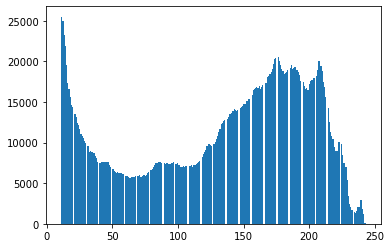

In [59]:
## Same for dense breast images 
dense_intensities = []

for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    dense_intensities.extend(img[img_mask].tolist())
    
x = plt.hist(dense_intensities,bins=256)

In [89]:
len(dense_intensities)

2623193

In [60]:
## Use scipy.stats.mode to get the mode of the two distributions above
from statistics import mode
dense_mode =scipy.stats.mode(dense_intensities)
fatty_mode =scipy.stats.mode(fatty_intensities)

In [61]:
dense_mode[0][0]

11

In [64]:
fatty_mode[0][0]

140

In [62]:
## Loop through all of the fatty images, binarize them using your threshold, and compare the peaks of the 
## distributions of the *tissue only* to the peaks of the distributions of all fatty and all dense breast images: 

for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    ## Use scipy.stats.mode to get the mode of the tissue in the image: 
    img_mode = scipy.stats.mode(img[img_mask])
    #print(img_mode)
    fatty_delta = img_mode[0][0] - fatty_mode[0][0]
    dense_delta = img_mode[0][0] - dense_mode[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Fatty
Fatty
Fatty
Dense
Fatty
Fatty
Fatty
Fatty
Dense
Fatty


In [63]:
## Loop through all of the dense images, binarize them using your threshold, and compare the peaks of the 
## distributions of the *tissue only* to the peaks of the distributions of all fatty and all dense breast images: 

for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    ## Use scipy.stats.mode to get the mode of the tissue in the image: 
    img_mode = scipy.stats.mode(img[img_mask])
    #print(img_mode)
    fatty_delta = img_mode[0][0] - fatty_mode[0][0]
    dense_delta = img_mode[0][0] - dense_mode[0][0]
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Dense
Dense
Fatty
Dense
Fatty
Fatty
Dense
Fatty
Dense
Fatty
